# Visualising and Analysing Geographic Data Using Folium, Shapely and Seaborn

## Intro
So this project started after being frustrated with my local council, Lambeth. We were seeing lots of flytipping all over the place and it felt like reports were falling on deaf ears.  ki 

In [45]:
import time
import pickle
import pandas as pd
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
pickled_data='20171212140428-report-data.pickle'
df = pd.read_pickle(pickled_data)

In [47]:
df.head()

,lat,lon,status,id,summary,date,last_update,fixed
0,51.419381,-0.128119,yellow,1159649,Pavement wide puddle outside The Bill pub. Ple...,2017-12-11 12:10:00,2017-12-11 12:15:12,False
1,51.420878,-0.129265,yellow,1159029,Fridge and furniture flytipped next to garage,2017-12-09 23:11:00,2017-12-09 23:15:04,False
2,51.423701,-0.130316,yellow,1159028,Furniture flytipped by st Reatham Antiques,2017-12-09 23:09:00,2017-12-09 23:10:05,False
3,51.422149,-0.129984,yellow,1159027,Rubbish building up in pavement,2017-12-09 23:08:00,2017-12-09 23:10:04,False
4,51.416900,-0.126273,yellow,1158967,Rubbish flytipped on pavement,2017-12-09 19:14:00,2017-12-09 19:15:06,False


In [48]:
df.dtypes

lat                   float64
lon                   float64
status                 object
id                      int64
summary                object
date           datetime64[ns]
last_update    datetime64[ns]
fixed                    bool
dtype: object

In [49]:
mask = (df['date'] >= '2017-09-01 15:45:00') & (df['date'] <= '2017-12-29 15:45:00')
df_reduced = df.loc[mask]

In [50]:
df['id'].count()
df_reduced['id'].count()

2125

192

In [51]:
import folium
import os
from folium import plugins
import numpy as np

In [52]:
m = folium.Map([51.459982, -0.120264], zoom_start=12)

lambeth = os.path.join('lambeth.boundaries.json')

folium.GeoJson(
    lambeth,
    name='geojson'
    ).add_to(m)

report_arr=df_reduced[['lat', 'lon']].as_matrix().tolist()
# plot heatmap
m.add_child(plugins.HeatMap(report_arr, radius=15), name='all_reports_heatmap')

In [53]:
from shapely.geometry import shape, Point
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [54]:
# load GeoJSON file containing sectors
data = json.load(open(lambeth))

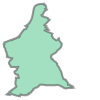

In [55]:
polygon = shape(data['features'][0]['geometry'])
polygon

In [56]:
distances = []
for index, row in df.iterrows():
    point = Point(row['lon'],row['lat'])
    distances.append(polygon.boundary.distance(point))
    

 (0, 0.024365855504677923),

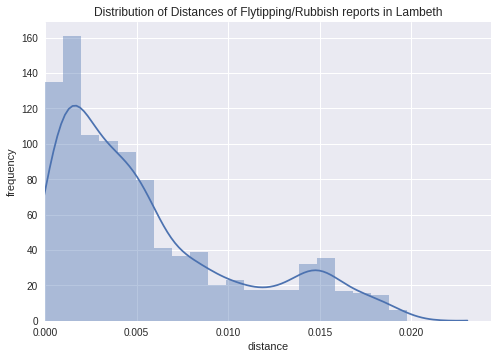

In [57]:
sns.set(color_codes=True)
sns.distplot(distances).set(xlim=(0, None),xlabel='distance', ylabel='frequency', title='Distribution of Distances of Flytipping/Rubbish reports in Lambeth')
plt.show()

In [58]:
def generate_random(number, polygon):
    list_of_points = []
    minx, miny, maxx, maxy = polygon.bounds
    counter = 0
    while counter < number:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            list_of_points.append(pnt)
            counter += 1
    return list_of_points

random_points = generate_random(len(distances),polygon)

In [59]:
random_distances = []
random_distances = [polygon.boundary.distance(x) for x in random_points]

 (0, 0.024365855504677923),

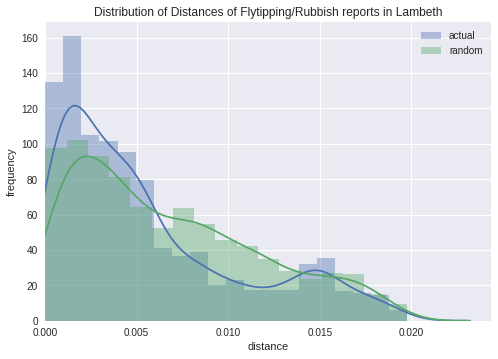

In [60]:
sns.set(color_codes=True)
sns.distplot(distances,label='actual').set(xlim=(0, None), xlabel='distance', ylabel='frequency', title='Distribution of Distances of Flytipping/Rubbish reports in Lambeth')
sns.distplot(random_distances,label='random')
plt.legend()
plt.show()

([array([ 622.,  433.,  367.,  163.,  125.,   86.,   74.,  143.,   68.,   44.]),
  array([ 416.,  387.,  296.,  241.,  228.,  179.,  124.,  104.,  110.,   40.])],
 array([  5.02802792e-07,   1.97858824e-03,   3.95667367e-03,
          5.93475910e-03,   7.91284453e-03,   9.89092997e-03,
          1.18690154e-02,   1.38471008e-02,   1.58251863e-02,
          1.78032717e-02,   1.97813571e-02]),
 <a list of 2 Lists of Patches objects>)

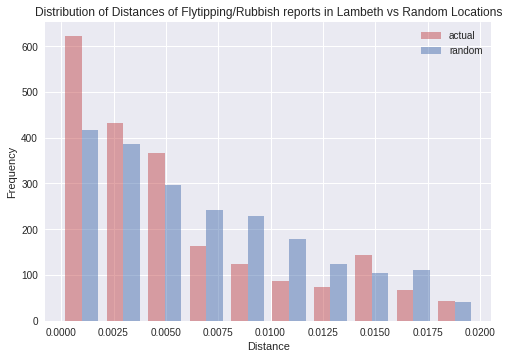

In [63]:
plt.hist([distances, random_distances], color=['r','b'], label=['actual','random'], alpha=0.5)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distances of Flytipping/Rubbish reports in Lambeth vs Random Locations')
plt.legend()
plt.show()